### Abstract:
#### Analysis of MTA 
determine most crowded stations in different divisions where the goal of the advertising campaign is spread 5 billboards over a wide geographical area

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [150103,150110,150117,150124,150131,150207,150214,150221,150228,150307,150314,150321]
turnstiles_df = get_data(week_nums)

In [3]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/27/2014,03:00:00,REGULAR,4936840,1672747
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/27/2014,07:00:00,REGULAR,4936852,1672762
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/27/2014,11:00:00,REGULAR,4936909,1672839
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/27/2014,15:00:00,REGULAR,4937131,1672892
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/27/2014,19:00:00,REGULAR,4937588,1672949


In [4]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [5]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [6]:
turnstiles_df.shape

(2318288, 11)

In [7]:
import datetime

In [8]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/27/2014,03:00:00,REGULAR,4936840,1672747,2014-12-27 03:00:00
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/27/2014,07:00:00,REGULAR,4936852,1672762,2014-12-27 07:00:00
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/27/2014,11:00:00,REGULAR,4936909,1672839,2014-12-27 11:00:00
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/27/2014,15:00:00,REGULAR,4937131,1672892,2014-12-27 15:00:00
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/27/2014,19:00:00,REGULAR,4937588,1672949,2014-12-27 19:00:00


In [9]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1851833,R249,R179,01-00-06,86 ST,2015-01-17 11:00:00,2
1870936,R256,R182,00-00-03,116 ST,2015-02-16 00:00:00,2
1851813,R249,R179,01-00-06,86 ST,2015-01-14 11:00:00,2
1870982,R256,R182,00-00-03,116 ST,2015-02-24 04:00:00,2
1851992,R249,R179,01-00-06,86 ST,2015-03-01 23:00:00,2
1521221,R138,R293,00-03-01,34 ST-PENN STA,2015-02-28 05:00:00,2
526749,N020,R101,00-00-05,145 ST,2015-02-18 23:00:00,2
137547,A071,R044,02-00-00,CHAMBERS ST,2015-02-24 03:00:00,2
1545523,R147,R033,04-00-04,42 ST-TIMES SQ,2015-03-19 08:00:00,1
1545520,R147,R033,04-00-04,42 ST-TIMES SQ,2015-03-18 20:00:00,1


here I find 8 duplicates entries , so to remove the duplicates and keep the orginal one I write the drop_duplicate

In [10]:
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [11]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,LEXINGTON AVE,2014-12-27 03:00:00,1
1545523,R147,R033,04-00-04,42 ST-TIMES SQ,2015-03-19 08:00:00,1
1545517,R147,R033,04-00-04,42 ST-TIMES SQ,2015-03-18 08:00:00,1
1545518,R147,R033,04-00-04,42 ST-TIMES SQ,2015-03-18 12:00:00,1
1545519,R147,R033,04-00-04,42 ST-TIMES SQ,2015-03-18 16:00:00,1


In [12]:
turnstiles_df.shape

(2318280, 12)

In [13]:
turnstiles_df.isna().sum()

C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
DATE_TIME    0
dtype: int64

* No more duplicate Entries

Now we can chick the last reading of the day (located at the top of the group)
using the .first() DataFrame method.

In [14]:
turnstiles_daily_entries = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())
turnstiles_daily_entries.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,LEXINGTON AVE,01/01/2015,4943965
1,A002,R051,02-00-00,LEXINGTON AVE,01/02/2015,4945409
2,A002,R051,02-00-00,LEXINGTON AVE,01/03/2015,4946200
3,A002,R051,02-00-00,LEXINGTON AVE,01/04/2015,4946488
4,A002,R051,02-00-00,LEXINGTON AVE,01/05/2015,4948333


In [15]:
turnstiles_daily_entries[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_entries
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))
turnstiles_daily_entries.head()

<ipython-input-15-42515aac6c8c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_entries[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_entries


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,LEXINGTON AVE,01/01/2015,4943965,NaN,NaN
1,A002,R051,02-00-00,LEXINGTON AVE,01/02/2015,4945409,01/01/2015,4943965.0
2,A002,R051,02-00-00,LEXINGTON AVE,01/03/2015,4946200,01/02/2015,4945409.0
3,A002,R051,02-00-00,LEXINGTON AVE,01/04/2015,4946488,01/03/2015,4946200.0
4,A002,R051,02-00-00,LEXINGTON AVE,01/05/2015,4948333,01/04/2015,4946488.0


In [16]:
turnstiles_daily_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
turnstiles_daily_entries.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,LEXINGTON AVE,01/02/2015,4945409,01/01/2015,4943965.0
2,A002,R051,02-00-00,LEXINGTON AVE,01/03/2015,4946200,01/02/2015,4945409.0
3,A002,R051,02-00-00,LEXINGTON AVE,01/04/2015,4946488,01/03/2015,4946200.0
4,A002,R051,02-00-00,LEXINGTON AVE,01/05/2015,4948333,01/04/2015,4946488.0
5,A002,R051,02-00-00,LEXINGTON AVE,01/06/2015,4950086,01/05/2015,4948333.0


* Next,let's handling  Reverse Entries

In [17]:
turnstiles_daily_entries[turnstiles_daily_entries["ENTRIES"] < turnstiles_daily_entries["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
79,A002,R051,02-00-00,LEXINGTON AVE,12/27/2014,4937823,03/20/2015,5054788.0
163,A002,R051,02-00-01,LEXINGTON AVE,12/27/2014,4588444,03/20/2015,4688375.0
247,A002,R051,02-03-00,LEXINGTON AVE,12/27/2014,423676,03/20/2015,465875.0
331,A002,R051,02-03-01,LEXINGTON AVE,12/27/2014,4530517,03/20/2015,4632036.0
415,A002,R051,02-03-02,LEXINGTON AVE,12/27/2014,4264820,03/20/2015,4364045.0


In [18]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

turnstiles_daily_entries["DAILY_ENTRIES"] = turnstiles_daily_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

3738 5307082.0
5189655 56120.0
889146727 13309412.0
13175174 889082964.0
1899 9584038.0
14114858 33559.0
9525652 14163858.0
1560322659 6124691.0
6041705 1560359637.0
1660958492 6726036.0
6652345 1660992338.0
1895815952 9413531.0
9317184 1895772251.0
1224695075 12037567.0
11926057 1224642765.0
83887173 837972.0
827874 83972419.0
2273 1314219.0
1267629 133812.0
117441029 4294466.0
505635 117444037.0
4217229 556164.0
553677910 2190952.0
2156893 553910089.0
1946173751 7627835.0
7543211 1946234967.0
396 1431943.0
1417380 19630.0
50331833 228225.0
211880 50393777.0
1120945 16345.0
12203 1122840.0
2192 3126607.0
3093105 16838.0
117449589 520817.0
511265 117491368.0
2821 1394202072.0
1394029225 54360.0
117440512 262144.0
262144 117440512.0
409 721715546.0
721614761 100888.0
65536 67109006.0
67109000 65536.0
2737 1570700.0
1473643 10839.0
100663296 0.0
0 100663296.0
805319715 3181495.0
3138511 805565969.0
117440626 543810.0
514109 117455143.0
830 9195383.0
9119573 48143.0
33570845 136307.0
396 

In [19]:
turnstiles_daily_entries.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,LEXINGTON AVE,01/02/2015,4945409,01/01/2015,4943965.0,1444.0
2,A002,R051,02-00-00,LEXINGTON AVE,01/03/2015,4946200,01/02/2015,4945409.0,791.0
3,A002,R051,02-00-00,LEXINGTON AVE,01/04/2015,4946488,01/03/2015,4946200.0,288.0
4,A002,R051,02-00-00,LEXINGTON AVE,01/05/2015,4948333,01/04/2015,4946488.0,1845.0
5,A002,R051,02-00-00,LEXINGTON AVE,01/06/2015,4950086,01/05/2015,4948333.0,1753.0


Now let's combine turnstiles daily entries that fall within the same Control Area ,Unit, Station

In [20]:
ca_unit_station_daily_entries = turnstiles_daily_entries.groupby(["C/A", "UNIT", "STATION", "DATE"])['DAILY_ENTRIES'].sum().reset_index()
ca_unit_station_daily_entries.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,LEXINGTON AVE,01/02/2015,13755.0
1,A002,R051,LEXINGTON AVE,01/03/2015,8138.0
2,A002,R051,LEXINGTON AVE,01/04/2015,5495.0
3,A002,R051,LEXINGTON AVE,01/05/2015,16799.0
4,A002,R051,LEXINGTON AVE,01/06/2015,16881.0


In [21]:
station_daily_entries = turnstiles_daily_entries.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily_entries.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AVE,01/02/2015,20383.0
1,1 AVE,01/03/2015,16852.0
2,1 AVE,01/04/2015,14409.0
3,1 AVE,01/05/2015,22933.0
4,1 AVE,01/06/2015,24159.0


* most crowded stations in daily entries is

In [22]:
station_totals_entries = station_daily_entries.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals_entries.head(10)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,24446133.0
1,42 ST-GRD CNTRL,22026266.0
2,34 ST-HERALD SQ,16676259.0
3,86 ST,15698125.0
4,14 ST-UNION SQ,14772895.0
5,42 ST-TIMES SQ,12766558.0
6,42 ST-PA BUS TE,12504478.0
7,125 ST,11367989.0
8,96 ST,10603355.0
9,FULTON ST,10167540.0


Let's check the EXITS

In [23]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,2014-12-27 03:00:00,1
1545523,R147,R033,04-00-04,42 ST-TIMES SQ,2015-03-19 08:00:00,1
1545517,R147,R033,04-00-04,42 ST-TIMES SQ,2015-03-18 08:00:00,1
1545518,R147,R033,04-00-04,42 ST-TIMES SQ,2015-03-18 12:00:00,1
1545519,R147,R033,04-00-04,42 ST-TIMES SQ,2015-03-18 16:00:00,1


In [24]:
turnstiles_daily_exits = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .EXITS.first())
turnstiles_daily_exits.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,01/01/2015,1674929
1,A002,R051,02-00-00,LEXINGTON AVE,01/02/2015,1675312
2,A002,R051,02-00-00,LEXINGTON AVE,01/03/2015,1675511
3,A002,R051,02-00-00,LEXINGTON AVE,01/04/2015,1675614
4,A002,R051,02-00-00,LEXINGTON AVE,01/05/2015,1676156


In [25]:
turnstiles_daily_exits[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_exits
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))
turnstiles_daily_exits.head()

<ipython-input-25-2bbdcebb33af>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_exits[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_exits


,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,01/01/2015,1674929,NaN,NaN
1,A002,R051,02-00-00,LEXINGTON AVE,01/02/2015,1675312,01/01/2015,1674929.0
2,A002,R051,02-00-00,LEXINGTON AVE,01/03/2015,1675511,01/02/2015,1675312.0
3,A002,R051,02-00-00,LEXINGTON AVE,01/04/2015,1675614,01/03/2015,1675511.0
4,A002,R051,02-00-00,LEXINGTON AVE,01/05/2015,1676156,01/04/2015,1675614.0


In [26]:
turnstiles_daily_exits.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
turnstiles_daily_exits.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
1,A002,R051,02-00-00,LEXINGTON AVE,01/02/2015,1675312,01/01/2015,1674929.0
2,A002,R051,02-00-00,LEXINGTON AVE,01/03/2015,1675511,01/02/2015,1675312.0
3,A002,R051,02-00-00,LEXINGTON AVE,01/04/2015,1675614,01/03/2015,1675511.0
4,A002,R051,02-00-00,LEXINGTON AVE,01/05/2015,1676156,01/04/2015,1675614.0
5,A002,R051,02-00-00,LEXINGTON AVE,01/06/2015,1676815,01/05/2015,1676156.0


In [27]:
turnstiles_daily_exits[turnstiles_daily_exits["EXITS"] < turnstiles_daily_exits["PREV_EXITS"]].head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
79,A002,R051,02-00-00,LEXINGTON AVE,12/27/2014,1672997,03/20/2015,1712328.0
163,A002,R051,02-00-01,LEXINGTON AVE,12/27/2014,1000661,03/20/2015,1023100.0
247,A002,R051,02-03-00,LEXINGTON AVE,12/27/2014,1592300,03/20/2015,1759068.0
331,A002,R051,02-03-01,LEXINGTON AVE,12/27/2014,7105546,03/20/2015,7277746.0
415,A002,R051,02-03-02,LEXINGTON AVE,12/27/2014,5856043,03/20/2015,6003193.0


In [28]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["EXITS"], row["PREV_EXITS"])
        return 0
    return counter

turnstiles_daily_exits["DAILY_EXITS"] = turnstiles_daily_exits.apply(get_daily_counts, axis=1, max_counter=1000000)

736 2682005.0
2612344 31995.0
494897065 14825883.0
14682535 494832587.0
5862 6765717.0
16309810 26706.0
6727821 16339567.0
1291890398 5089735.0
5035380 1291916443.0
1258256423 6514068.0
6441567 1258223576.0
1778368004 9875162.0
9772097 1778319542.0
1493107295 10991810.0
10879399 1493055046.0
707 6035470.0
5907386 111818.0
100689450 431379.0
417899 100732169.0
587254336 2316741.0
2292378 587284801.0
16777259 58047.0
50747 16801898.0
1538009 52912.0
46183 1541960.0
600 3669152.0
3636433 14723.0
352336695 1376490.0
1351407 352431401.0
3353 1276539666.0
1276398386 44949.0
1032 1062133.0
24 33576209.0
33573558 2877.0
369124062 1447727.0
1430205 369279975.0
384 4857346.0
4836661 11905.0
16843119 126964.0
19202743 16843119.0
16843727 19202743.0
473 16852288.0
16820042 80038.0
79543 16821378.0
720909 33610843.0
33609753 721831.0
163 5483882.0
5455190 48755.0
10393224 171065.0
480 10395074.0
167925826 34236903.0
33855169 168021901.0
218121804 881793.0
646896 218185659.0
107405106 446710.0
32770

In [29]:
turnstiles_daily_exits.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,LEXINGTON AVE,01/02/2015,1675312,01/01/2015,1674929.0,383.0
2,A002,R051,02-00-00,LEXINGTON AVE,01/03/2015,1675511,01/02/2015,1675312.0,199.0
3,A002,R051,02-00-00,LEXINGTON AVE,01/04/2015,1675614,01/03/2015,1675511.0,103.0
4,A002,R051,02-00-00,LEXINGTON AVE,01/05/2015,1676156,01/04/2015,1675614.0,542.0
5,A002,R051,02-00-00,LEXINGTON AVE,01/06/2015,1676815,01/05/2015,1676156.0,659.0


Now let's combine turnstiles daily exits that fall within the same Control Area ,Unit, Station

In [30]:
ca_unit_station_daily_exits = turnstiles_daily_exits.groupby(["C/A", "UNIT", "STATION", "DATE"])['DAILY_EXITS'].sum().reset_index()
ca_unit_station_daily_exits.head()

,C/A,UNIT,STATION,DATE,DAILY_EXITS
0,A002,R051,LEXINGTON AVE,01/02/2015,8050.0
1,A002,R051,LEXINGTON AVE,01/03/2015,3522.0
2,A002,R051,LEXINGTON AVE,01/04/2015,2569.0
3,A002,R051,LEXINGTON AVE,01/05/2015,10314.0
4,A002,R051,LEXINGTON AVE,01/06/2015,10390.0


In [31]:
station_daily_exits = turnstiles_daily_exits.groupby(["STATION", "DATE"])[['DAILY_EXITS']].sum().reset_index()
station_daily_exits.head()

,STATION,DATE,DAILY_EXITS
0,1 AVE,01/02/2015,22475.0
1,1 AVE,01/03/2015,18909.0
2,1 AVE,01/04/2015,15338.0
3,1 AVE,01/05/2015,24934.0
4,1 AVE,01/06/2015,24942.0


* most crowded stations in daily exits

In [32]:
station_totals_exits = station_daily_exits.groupby('STATION').sum()\
    .sort_values('DAILY_EXITS', ascending=False)\
    .reset_index()

station_totals_exits.head(10)

,STATION,DAILY_EXITS
0,34 ST-PENN STA,20817581.0
1,42 ST-GRD CNTRL,18387861.0
2,34 ST-HERALD SQ,15130715.0
3,14 ST-UNION SQ,15088442.0
4,86 ST,13198852.0
5,42 ST-TIMES SQ,11706552.0
6,42 ST-PA BUS TE,10030745.0
7,FULTON ST,9184721.0
8,59 ST-COLUMBUS,8995541.0
9,125 ST,8753496.0


In [33]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
191446,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/20/2015,21:00:00,REGULAR,5554,202,2015-03-20 21:00:00
191445,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/20/2015,17:00:00,REGULAR,5554,202,2015-03-20 17:00:00
191444,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/20/2015,13:00:00,REGULAR,5554,202,2015-03-20 13:00:00
191443,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/20/2015,09:00:00,REGULAR,5554,202,2015-03-20 09:00:00
191442,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/20/2015,05:00:00,REGULAR,5554,202,2015-03-20 05:00:00


* Create a column showing the crowd by adding the daily entries and daily exits

In [34]:
turnstiles_df['Crowd'] = (turnstiles_daily_entries["DAILY_ENTRIES"] + turnstiles_daily_exits["DAILY_EXITS"])
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Crowd
191446,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/20/2015,21:00:00,REGULAR,5554,202,2015-03-20 21:00:00,2862.0
191445,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/20/2015,17:00:00,REGULAR,5554,202,2015-03-20 17:00:00,2919.0
191444,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/20/2015,13:00:00,REGULAR,5554,202,2015-03-20 13:00:00,2800.0
191443,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/20/2015,09:00:00,REGULAR,5554,202,2015-03-20 09:00:00,2575.0
191442,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/20/2015,05:00:00,REGULAR,5554,202,2015-03-20 05:00:00,1290.0


In [35]:
Crowd_STATION = (turnstiles_df.groupby(['STATION'])['Crowd'].sum()
                 .reset_index()
                 .sort_values(by='Crowd',ascending=False)
                 .STATION.head(20))
Crowd_STATION

230          FULTON ST
66     34 ST-HERALD SQ
67      34 ST-PENN STA
174           CANAL ST
72     42 ST-GRD CNTRL
190       CORTLANDT ST
133    BARCLAYS CENTER
260    JAY ST-METROTEC
78       47-50 ST-ROCK
179        CHAMBERS ST
18      14 ST-UNION SQ
73     42 ST-PA BUS TE
182         CHURCH AVE
331          RECTOR ST
74      42 ST-TIMES SQ
11              125 ST
370            WALL ST
90               59 ST
349         ST. GEORGE
219       FLATBUSH AVE
Name: STATION, dtype: object

In [36]:
most_crowd_stations_daily=\
    turnstiles_df[turnstiles_df['STATION'].isin(Crowd_STATION)].sort_values(by='Crowd',ascending=False)
most_crowd_stations_daily.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Crowd
154213,R258,R132,00-00-01,125 ST,456,IRT,02/08/2015,20:00:00,REGULAR,1041056,1262999,2015-02-08 20:00:00,961656.0
154213,R236,R045,00-06-01,42 ST-GRD CNTRL,4567S,IRT,01/12/2015,12:00:00,REGULAR,4194898,2978546,2015-01-12 12:00:00,961656.0
9698,A055,R227,00-00-03,RECTOR ST,R,BMT,03/14/2015,20:00:00,REGULAR,2670533,958840,2015-03-14 20:00:00,949341.0
9698,A054,R227,01-03-00,RECTOR ST,R,BMT,01/20/2015,03:00:00,REGULAR,2893851,1087005,2015-01-20 03:00:00,949341.0
9698,A055,R227,00-00-03,RECTOR ST,R,BMT,03/13/2015,16:00:00,REGULAR,2670130,958771,2015-03-13 16:00:00,949341.0
9698,A054,R227,01-00-00,RECTOR ST,R,BMT,12/28/2014,15:00:00,REGULAR,4307733,6708591,2014-12-28 15:00:00,949341.0
9698,A055,R227,00-00-04,RECTOR ST,R,BMT,03/06/2015,19:00:00,REGULAR,3542571,1737296,2015-03-06 19:00:00,949341.0
9698,A054,R227,01-03-01,RECTOR ST,R,BMT,01/26/2015,19:00:00,REGULAR,2137807,348297,2015-01-26 19:00:00,949341.0
9698,A054,R227,01-00-01,RECTOR ST,R,BMT,01/08/2015,03:00:00,REGULAR,2601108,1960189,2015-01-08 03:00:00,949341.0
9698,A054,R227,01-06-00,RECTOR ST,R,BMT,02/27/2015,07:00:00,REGULAR,2381820,577110,2015-02-27 07:00:00,949341.0


Text(0.5, 1.0, 'Top crowd Stations during January ,February and March')

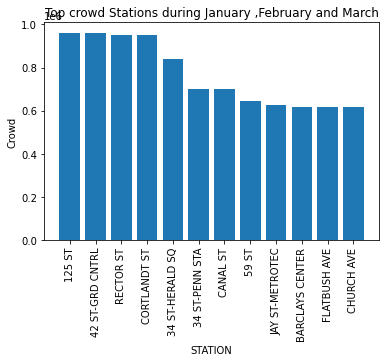

In [37]:
plt.bar(x=most_crowd_stations_daily['STATION'][:50], height=most_crowd_stations_daily['Crowd'][:50])
plt.xticks(rotation=90)
plt.xlabel('STATION')
plt.ylabel('Crowd')
plt.title('Top crowd Stations during January ,February and March' )

### The main point in this exploratory data analysis I looking for most crowded stations in different divisions

* So I do query by using sql :

In [38]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://',echo=False)

In [39]:
turnstiles_df.to_sql("most_crowd_stations_daily",con=engine)

In [40]:
unique_divisions=pd.read_sql('SELECT STATION,DIVISION,Crowd FROM most_crowd_stations_daily GROUP BY DIVISION ORDER BY Crowd DESC limit 10;',engine)
unique_divisions.head()

,STATION,DIVISION,Crowd
0,DYRE AVE,IRT,5344.0
1,JAMAICA CENTER,IND,3512.0
2,PATH WTC 2,PTH,3076.0
3,RIT-ROOSEVELT,RIT,2862.0
4,TOMPKINSVILLE,SRT,1070.0


#### show client the information that I  get from this exploratory data analysis

Text(0.5, 1.0, 'Most Crowded Stations in Unique Divisions')

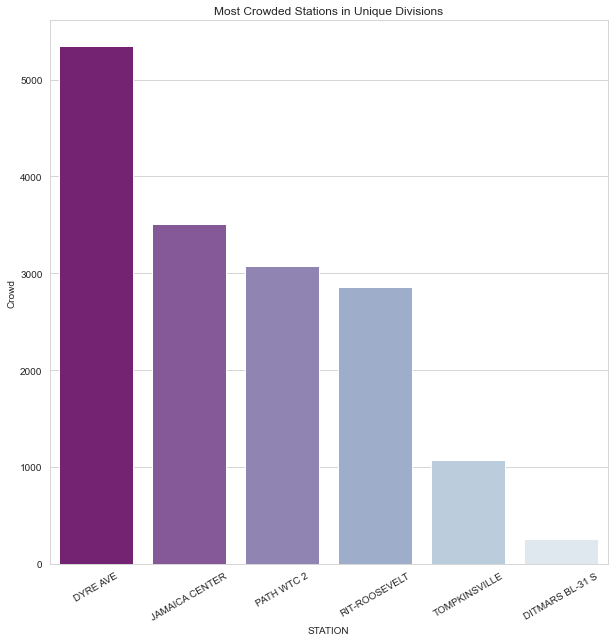

In [41]:
from importlib import reload
reload(plt)
plt.figure(figsize=[10,10])
sns.set_style('whitegrid')
sns.barplot(x='STATION',y='Crowd',data=unique_divisions,ci=0,palette=sns.color_palette("BuPu_r"))
plt.xlabel('STATION')
plt.ylabel('Crowd')
plt.xticks(rotation=30)
plt.title('Most Crowded Stations in Unique Divisions')

* Few statistics meaningful values in genral data:

In [42]:
stat_stations =turnstiles_df.groupby('STATION').Crowd.agg(['mean', 'std', 'median'])
stat_stations.head()

,mean,std,median
STATION,,,
1 AVE,1584.208308,24121.989981,155.0
103 ST,2365.642734,17614.003373,854.0
103 ST-CORONA,2450.142261,12603.745876,1181.0
104 ST,2502.814128,14441.033563,1165.0
110 ST,3387.198944,25870.718312,1104.0
